# EDA Using Python

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import zscore


# Load the CSV file into a pandas DataFrame
file_path = r"C:\Users\Dath\Documents\DathDataAnalystTraining\Projects\Cargo Project AIS Dataset\ais_data.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to inspect
print(df.head())

   number       mmsi navigationalstatus  sog    cog  heading     shiptype  \
0       0  219019621      Unknown value  0.0   86.0     86.0      Fishing   
1       1  265628170      Unknown value  0.0  334.5      NaN  Port tender   
2       2  219005719      Unknown value  0.0  208.7      NaN      Fishing   
3       3  219028066      Unknown value  0.0    NaN      NaN     Pleasure   
4       4  212584000             Moored  0.0  153.0    106.0        Cargo   

   width  length  draught  
0    4.0     9.0      NaN  
1    8.0    27.0      NaN  
2    4.0    11.0      NaN  
3    3.0    12.0      NaN  
4   13.0    99.0      6.3  


In [37]:
# Display the columns to check for duplicates
print(df.columns)

Index(['number', 'mmsi', 'navigationalstatus', 'sog', 'cog', 'heading',
       'shiptype', 'width', 'length', 'draught'],
      dtype='object')


In [39]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset contains 358351 rows and 10 columns.


In [41]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358351 entries, 0 to 358350
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   number              358351 non-null  int64  
 1   mmsi                358351 non-null  int64  
 2   navigationalstatus  358351 non-null  object 
 3   sog                 357893 non-null  float64
 4   cog                 355182 non-null  float64
 5   heading             337737 non-null  float64
 6   shiptype            358351 non-null  object 
 7   width               354640 non-null  float64
 8   length              354608 non-null  float64
 9   draught             332808 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 27.3+ MB


number                    0
mmsi                      0
navigationalstatus        0
sog                     458
cog                    3169
heading               20614
shiptype                  0
width                  3711
length                 3743
draught               25543
dtype: int64

In [43]:
df.describe()

,number,mmsi,sog,cog,heading,width,length,draught
count,358351.000000,3.583510e+05,357893.000000,355182.000000,337737.000000,354640.000000,354608.000000,332808.000000
mean,186757.775285,2.939678e+08,12.122554,189.064529,190.076829,19.947854,124.971549,6.571402
std,112181.601870,1.213866e+08,9.355851,107.588825,107.107604,10.808627,71.268183,2.934392
min,0.000000,9.112856e+06,0.000000,0.000000,0.000000,1.000000,2.000000,0.400000
25%,89587.500000,2.195780e+08,9.200000,116.300000,120.000000,12.000000,83.000000,4.600000
50%,179947.000000,2.486590e+08,11.300000,168.700000,170.000000,17.000000,115.000000,6.100000
75%,283503.500000,3.046650e+08,13.300000,300.175000,303.000000,28.000000,181.000000,7.900000
max,387581.000000,9.921950e+08,214.000000,359.900000,507.000000,78.000000,690.000000,25.500000


In [45]:
df

,number,mmsi,navigationalstatus,sog,cog,heading,shiptype,width,length,draught
0,0,219019621,Unknown value,0.0,86.0,86.0,Fishing,4.0,9.0,NaN
1,1,265628170,Unknown value,0.0,334.5,NaN,Port tender,8.0,27.0,NaN
2,2,219005719,Unknown value,0.0,208.7,NaN,Fishing,4.0,11.0,NaN
3,3,219028066,Unknown value,0.0,NaN,NaN,Pleasure,3.0,12.0,NaN
4,4,212584000,Moored,0.0,153.0,106.0,Cargo,13.0,99.0,6.3
...,...,...,...,...,...,...,...,...,...,...
358346,387577,236125000,Under way using engine,11.0,171.9,169.0,Cargo,12.0,82.0,4.2
358347,387578,209717000,Under way using engine,16.6,341.6,343.0,Cargo,27.0,170.0,8.9
358348,387579,257182000,Under way using engine,20.6,340.7,341.0,Passenger,36.0,224.0,6.9
358349,387580,219007697,Unknown value,34.9,96.2,NaN,Pilot,3.0,7.0,NaN


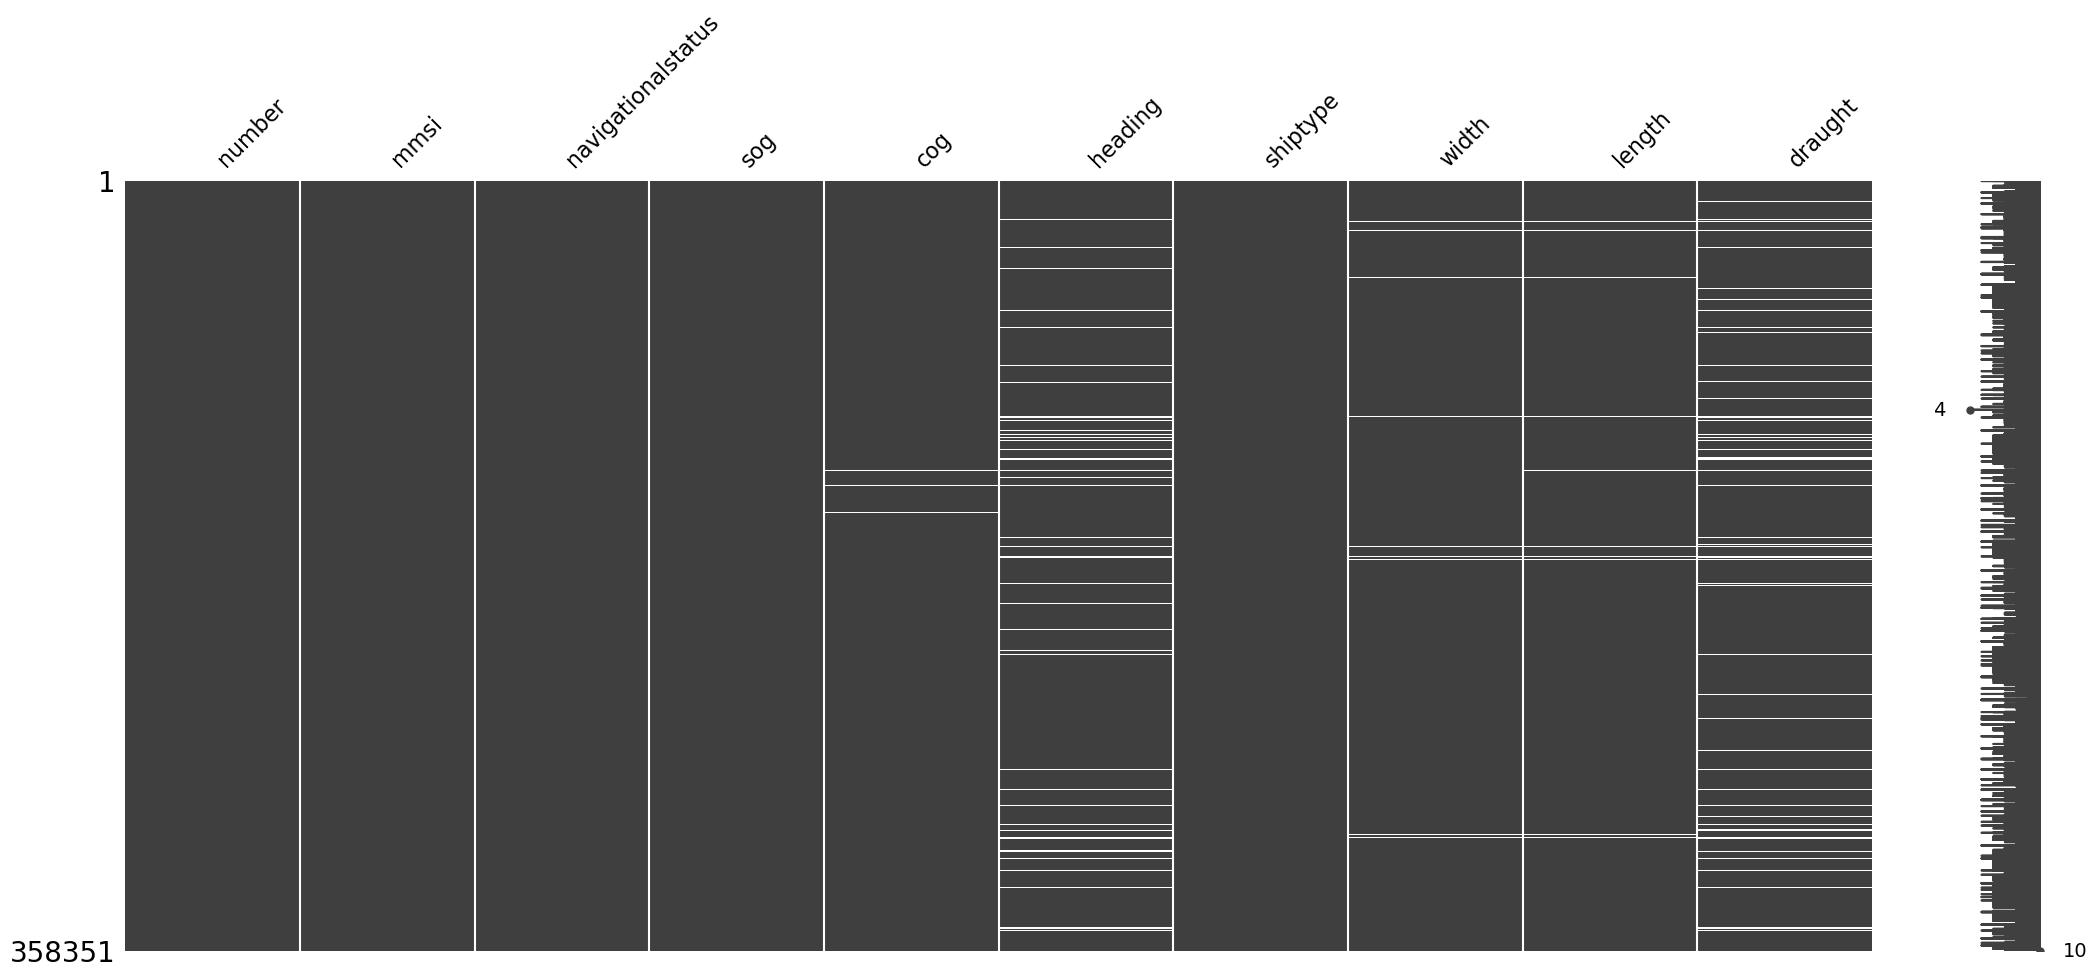

In [47]:
msno.matrix(df)
plt.show()

In [16]:
df_backup = df.copy()
df2 = df.copy()
df2.isnull().sum()

number                    0
mmsi                      0
navigationalstatus        0
sog                     458
cog                    3169
heading               20614
shiptype                  0
width                  3711
length                 3743
draught               25543
dtype: int64

In [49]:
# Step 1: Remove rows with null values in critical columns
cleaned_data = df2.dropna(subset=['sog', 'cog', 'width', 'length', 'draught','heading'])

In [51]:
# Step 2: Ensure all numerical columns are float type
numerical_columns = ['sog', 'cog', 'heading', 'width', 'length', 'draught']
for col in numerical_columns:
    cleaned_data[col] = cleaned_data[col].astype(float)
print(df2['draught'].unique())
print(df2['width'].unique())
print(df2['length'].unique())


[ nan  6.3  6.8  5.2  4.2  3.6  5.3  2.5  7.2  5.   2.2  6.   6.6  2.1
  5.8  9.9  2.   6.2  4.8  1.7  2.9  3.7  3.4  4.3  3.9  2.6  3.   8.3
  1.5  7.7  9.4  1.8  7.5  2.8  3.5  5.7  3.8  4.9  6.4  7.   7.6  5.6
  4.7  9.6  5.4 13.7  8.   4.1 10.5 13.3  4.5  6.5 11.4  6.1  9.   7.8
 10.7  1.3  9.7  8.6  8.8 14.5  7.9  6.7  6.9 12.8  5.5  7.1 10.6 14.1
  7.3  5.1  3.2 12.2 10.1  2.4 14.  11.1 10.2  3.3  4.   1.2  8.7  4.4
 13.6  2.7  8.9  7.4  9.5 10.  13.  12.1  4.6  1.6  5.9 12.7 13.5 10.9
  8.5  8.2  3.1  8.1  1.9  1.  12.  25.5 10.3  2.3 20.   0.9 13.9 11.2
 11.3 14.3 12.3 10.8 10.4 12.4 11.   0.7  1.4 13.4  9.8  0.6 11.7  9.2
 12.6 11.5 14.4 13.8 14.2 13.2  9.1 11.6  0.8  8.4 12.9 25.  14.6 15.
  0.5  9.3 13.1 11.8 11.9 14.9 14.7 12.5 17.1 15.5 14.8 17.4 19.3  1.1
 18.   0.4 20.1 20.5 15.8]
[ 4.  8.  3. 13. 23. nan 16. 12.  6.  5. 32.  2. 15.  9. 20. 27. 29. 14.
 11.  7. 31. 18. 19. 30. 17. 24. 21. 42. 43. 28. 26. 25. 36. 22. 44. 33.
 48. 10. 46. 38. 50. 34. 59. 60. 37. 45. 40. 54

C:\Users\Dath\AppData\Local\Temp\ipykernel_12800\3100542384.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[col] = cleaned_data[col].astype(float)
C:\Users\Dath\AppData\Local\Temp\ipykernel_12800\3100542384.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[col] = cleaned_data[col].astype(float)
C:\Users\Dath\AppData\Local\Temp\ipykernel_12800\3100542384.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [53]:
# Step 3: Check for bias in data removal
# We'll compare the distributions of 'shiptype' before and after removing rows
initial_distribution = df2['shiptype'].value_counts(normalize=True)
cleaned_distribution = cleaned_data['shiptype'].value_counts(normalize=True)
distribution_comparison = pd.DataFrame({
    'Initial Distribution': initial_distribution,
    'Cleaned Distribution': cleaned_distribution
}).fillna(0)  # Fill NaNs with 0 for missing categories in the cleaned data

# Calculate the percentage of rows removed
rows_removed = df2.shape[0] - cleaned_data.shape[0]
percentage_removed = (rows_removed / df2.shape[0]) * 100

In [55]:
# Step 4: Export the cleaned data to a new CSV file
cleaned_file_path = 'path_to_cleaned_ais_data.csv'  # Replace with your desired output path
cleaned_data.to_csv(cleaned_file_path, index=False)

# Display the results
print(f"Total rows removed: {rows_removed} ({percentage_removed:.2f}%)")
print("Bias check - Ship type distribution before and after cleaning:")
print(distribution_comparison)

# Output file path for verification
print(f"Cleaned data saved to {cleaned_file_path}")

Total rows removed: 31718 (8.85%)
Bias check - Ship type distribution before and after cleaning:
                  Initial Distribution  Cleaned Distribution
shiptype                                                    
Cargo                         0.530282              0.575588
Dredging                      0.015158              0.015672
Fishing                       0.071106              0.036861
HSC                           0.010532              0.011404
Law enforcement               0.004710              0.004641
Military                      0.020201              0.018397
Passenger                     0.049742              0.051446
Pilot                         0.011293              0.008799
Pleasure                      0.012664              0.000236
Port tender                   0.000871              0.000162
Reserved                      0.002297              0.001794
SAR                           0.012136              0.001528
Sailing                       0.007113           

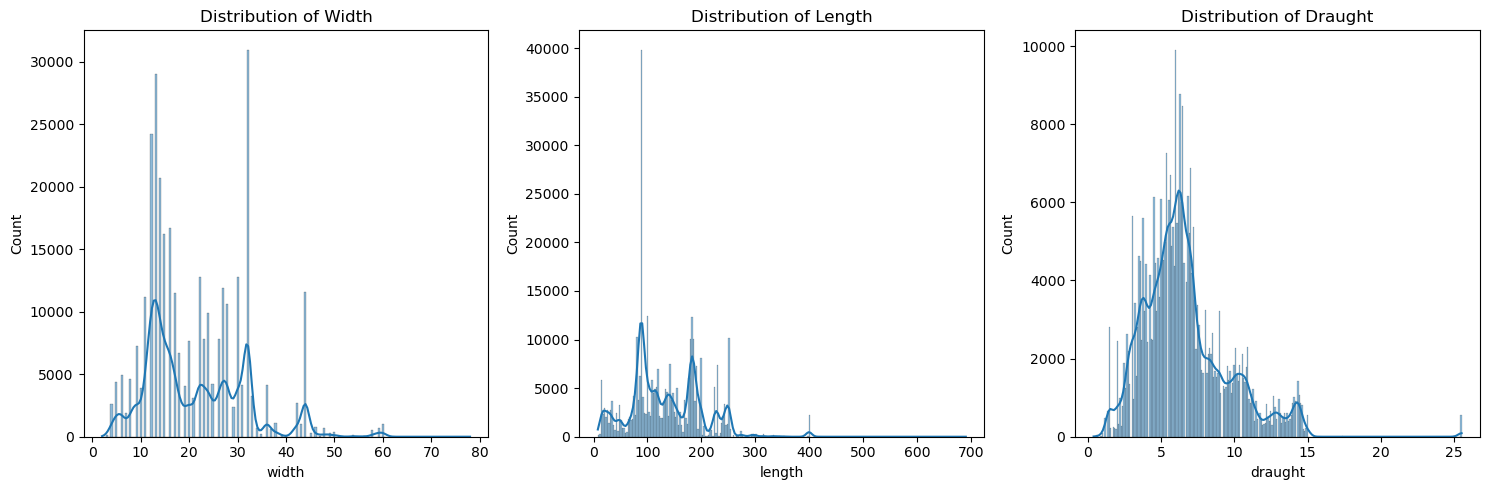

In [56]:
plt.figure(figsize=(15, 5))

# Plot distribution of 'width'
plt.subplot(1, 3, 1)
sns.histplot(cleaned_data['width'], kde=True)
plt.title('Distribution of Width')

# Plot distribution of 'length'
plt.subplot(1, 3, 2)
sns.histplot(cleaned_data['length'], kde=True)
plt.title('Distribution of Length')

# Plot distribution of 'draught'
plt.subplot(1, 3, 3)
sns.histplot(cleaned_data['draught'], kde=True)
plt.title('Distribution of Draught')

plt.tight_layout()
plt.show()

In [57]:
df2

,number,mmsi,navigationalstatus,sog,cog,heading,shiptype,width,length,draught
0,0,219019621,Unknown value,0.0,86.0,86.0,Fishing,4.0,9.0,NaN
1,1,265628170,Unknown value,0.0,334.5,NaN,Port tender,8.0,27.0,NaN
2,2,219005719,Unknown value,0.0,208.7,NaN,Fishing,4.0,11.0,NaN
3,3,219028066,Unknown value,0.0,NaN,NaN,Pleasure,3.0,12.0,NaN
4,4,212584000,Moored,0.0,153.0,106.0,Cargo,13.0,99.0,6.3
...,...,...,...,...,...,...,...,...,...,...
358346,387577,236125000,Under way using engine,11.0,171.9,169.0,Cargo,12.0,82.0,4.2
358347,387578,209717000,Under way using engine,16.6,341.6,343.0,Cargo,27.0,170.0,8.9
358348,387579,257182000,Under way using engine,20.6,340.7,341.0,Passenger,36.0,224.0,6.9
358349,387580,219007697,Unknown value,34.9,96.2,NaN,Pilot,3.0,7.0,NaN


In [58]:
cleaned_data

,number,mmsi,navigationalstatus,sog,cog,heading,shiptype,width,length,draught
4,4,212584000,Moored,0.0,153.0,106.0,Cargo,13.0,99.0,6.3
5,5,636020662,At anchor,0.1,43.9,286.0,Cargo,23.0,149.0,6.3
7,7,246539000,At anchor,0.0,3.8,293.0,Cargo,16.0,150.0,6.8
8,8,210307000,Moored,0.0,285.1,225.0,Cargo,16.0,90.0,5.2
11,11,219263000,Moored,0.0,353.9,100.0,Military,12.0,48.0,4.2
...,...,...,...,...,...,...,...,...,...,...
358345,387576,266475000,Under way using engine,11.2,92.4,90.0,Tanker,17.0,120.0,6.7
358346,387577,236125000,Under way using engine,11.0,171.9,169.0,Cargo,12.0,82.0,4.2
358347,387578,209717000,Under way using engine,16.6,341.6,343.0,Cargo,27.0,170.0,8.9
358348,387579,257182000,Under way using engine,20.6,340.7,341.0,Passenger,36.0,224.0,6.9


In [59]:
cleaned_data.isnull().sum()

number                0
mmsi                  0
navigationalstatus    0
sog                   0
cog                   0
heading               0
shiptype              0
width                 0
length                0
draught               0
dtype: int64